<a href="https://colab.research.google.com/github/akarshpyr/Akarshcodes12/blob/main/Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
%matplotlib inline


In [2]:
time = np.arange(50)

In [3]:
time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [4]:
trend = np.empty_like(time,dtype='float')
for t in time:
  if t<10:
    trend[t] = t*2.25
  elif t<30:
    trend[t] = t*-0.5 + 25
  else:
    trend[t] = t*1.25 -28

In [5]:
trend

array([ 0.  ,  2.25,  4.5 ,  6.75,  9.  , 11.25, 13.5 , 15.75, 18.  ,
       20.25, 20.  , 19.5 , 19.  , 18.5 , 18.  , 17.5 , 17.  , 16.5 ,
       16.  , 15.5 , 15.  , 14.5 , 14.  , 13.5 , 13.  , 12.5 , 12.  ,
       11.5 , 11.  , 10.5 ,  9.5 , 10.75, 12.  , 13.25, 14.5 , 15.75,
       17.  , 18.25, 19.5 , 20.75, 22.  , 23.25, 24.5 , 25.75, 27.  ,
       28.25, 29.5 , 30.75, 32.  , 33.25])

In [13]:
tda = pd.DataFrame({'time_min':time,'trend_vals':trend})

In [14]:
tda

,time_min,trend_vals
0,0,0.00
1,1,2.25
2,2,4.50
3,3,6.75
4,4,9.00
5,5,11.25
6,6,13.50
7,7,15.75
8,8,18.00
9,9,20.25


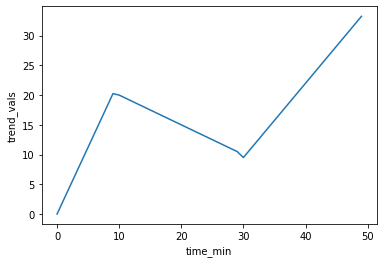

In [20]:
sns.lineplot(x='time_min',y='trend_vals',data=tda)

In [21]:
seasonal = 10+np.sin(time)*10


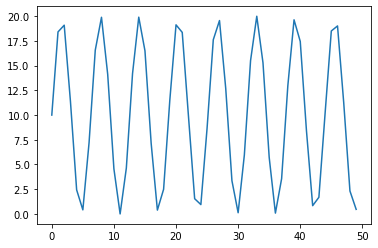

In [22]:
plt.plot(time,seasonal)

In [25]:
np.random.seed(10)
residual = np.random.normal(loc=0.0,scale=1,size=len(time))

Text(0, 0.5, 'elec_dem')

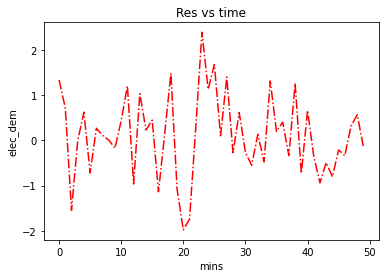

In [26]:
plt.plot(time,residual,'r-.')
plt.title('Res vs time')
plt.xlabel('mins')
plt.ylabel('elec_dem')


In [27]:
additive = trend+seasonal+residual

Text(0, 0.5, 'sensor_measurements')

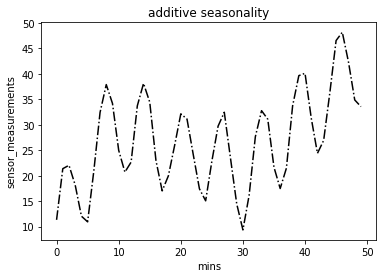

In [28]:
plt.plot(time,additive,'k-.')
plt.title('additive seasonality')
plt.xlabel('mins')
plt.ylabel('sensor_measurements')

In [31]:
igno_resi = np.ones_like(residual)

In [32]:
multi = trend*seasonal*igno_resi

Text(0, 0.5, 'sensor_measurements')

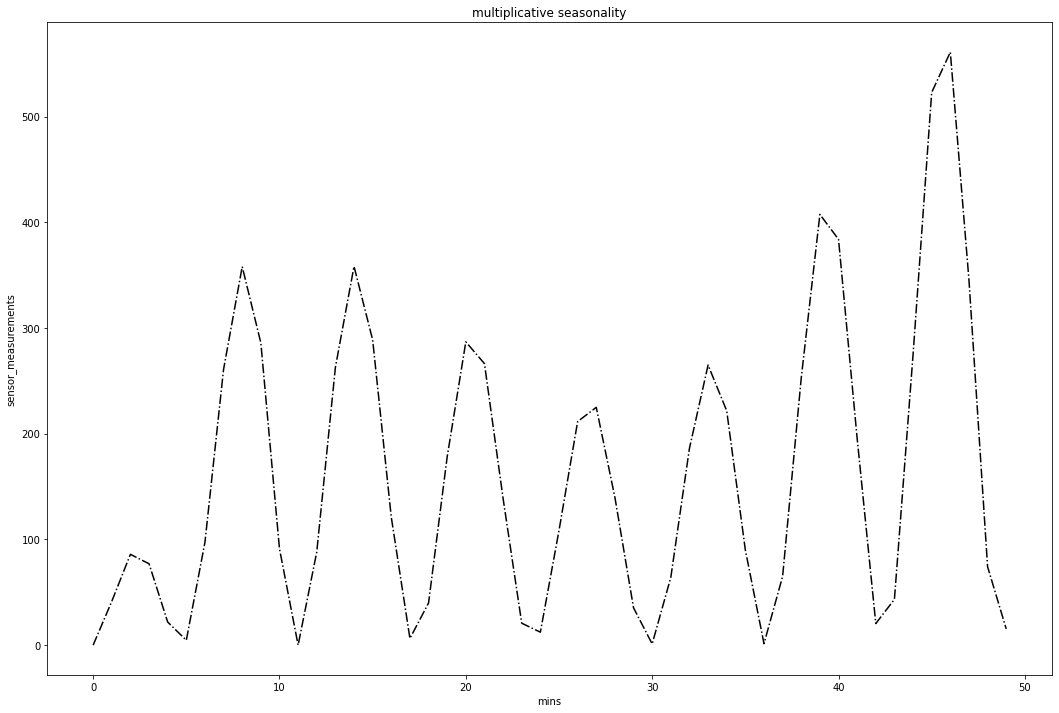

In [33]:
plt.figure(figsize=(18,12))
plt.plot(time,multi,'k-.')
plt.title('multiplicative seasonality')
plt.xlabel('mins')
plt.ylabel('sensor_measurements')

In [36]:
df = pd.read_csv('/content/Electric_Production.csv',index_col=0)

In [37]:
df

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151
...,...
09-01-2017,98.6154
10-01-2017,93.6137
11-01-2017,97.3359


In [38]:
from pylab import rcParams
rcParams['figure.figsize']=20,5

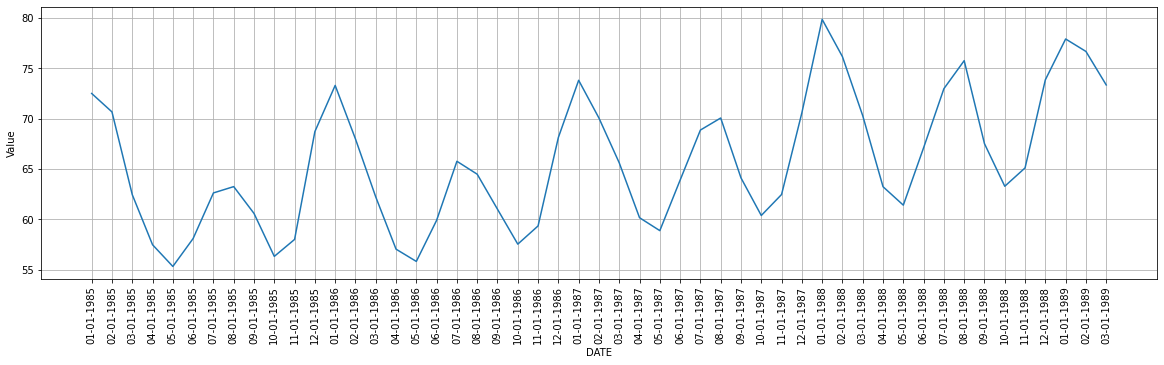

In [46]:
sns.lineplot(x='DATE',y='Value',data=df.iloc[0:51,:])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [47]:
roll = df.iloc[:51,:].rolling(window=3).mean()

In [48]:
roll

,Value
DATE,
01-01-1985,NaN
02-01-1985,NaN
03-01-1985,68.542467
04-01-1985,63.531200
05-01-1985,58.412233
06-01-1985,56.958967
07-01-1985,58.675233
08-01-1985,61.319700
09-01-1985,62.151100


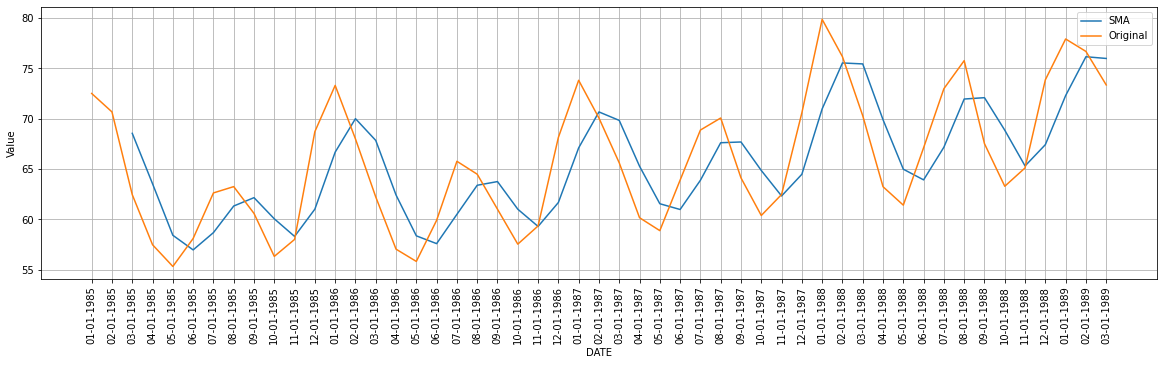

In [51]:
sns.lineplot(x='DATE',y='Value',data=roll,label='SMA')
sns.lineplot(x='DATE',y='Value',data=df.iloc[0:51,:],label='Original')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()

In [53]:
from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing

In [54]:
data = df.iloc[:51,:]

In [55]:
data

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151
06-01-1985,58.0904
07-01-1985,62.6202
08-01-1985,63.2485
09-01-1985,60.5846


In [56]:
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)
fit3 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=True)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


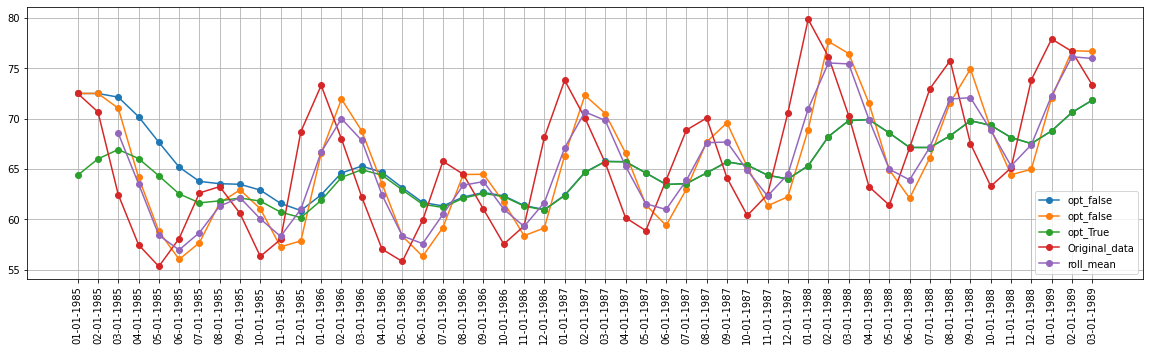

In [57]:
plt.plot(fit1.fittedvalues, marker='o',label='opt_false')
plt.plot(fit2.fittedvalues, marker='o',label='opt_false')
plt.plot(fit3.fittedvalues, marker='o',label='opt_True')
plt.plot(data,marker='o',label = 'Original_data')
plt.plot(roll,marker='o',label='roll_mean')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()